In [80]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# Load Dataset (Iris flower dataset, used commonly in ML and stats). 
# Clean Datasets – These are well-structured and don't require much cleaning.

df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
# 1. Descriptive stats
# 1.1 Mean

print("Mean:\n",df.mean(numeric_only=True))

Mean:
 sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64


In [34]:
# 1.2 Median

print("\nMedian:\n", df.median(numeric_only=True))



Median:
 sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64


In [36]:
# 1.3 Mode

print("\nMode:\n", df.mode(numeric_only=True).iloc[0])


Mode:
 sepal_length    5.0
sepal_width     3.0
petal_length    1.4
petal_width     0.2
Name: 0, dtype: float64


In [40]:
# 1.4 Variance & Standard Deviation
# Variance

print("variance:\n", df.var(numeric_only=True))

variance:
 sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64


In [42]:
# 1.5 Standard Deviation

print("\nStandard Deviation:\n", df.std(numeric_only=True))


Standard Deviation:
 sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64


In [44]:
# 1.6 Skewness & Kurtosis
# Skewness
print("Skewness:\n", df.skew(numeric_only=True))

Skewness:
 sepal_length    0.314911
sepal_width     0.318966
petal_length   -0.274884
petal_width    -0.102967
dtype: float64


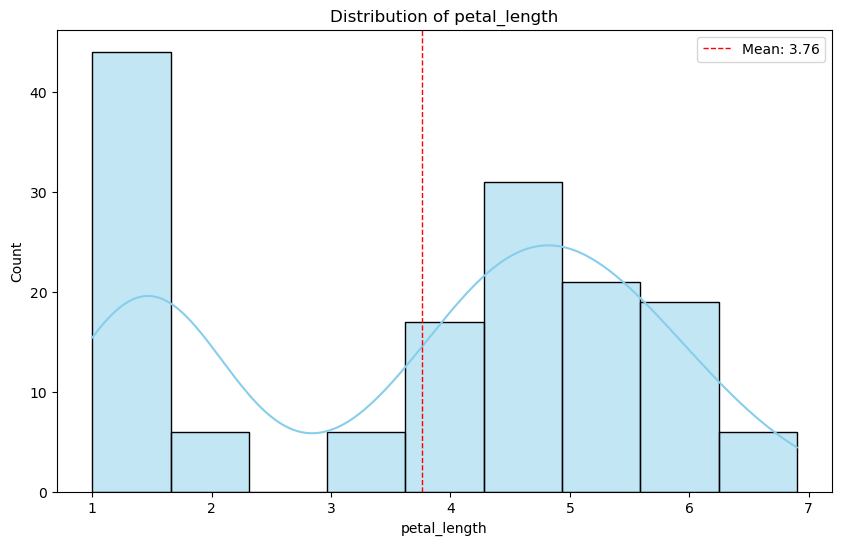

Skewness of petal_length: -0.27
Kurtosis of petal_length: -1.40


In [82]:
# Choose one feature, e.g., petal_length
col = 'petal_length'
plt.figure(figsize=(10, 6))
sns.histplot(df[col], kde=True, color='skyblue')
plt.title(f'Distribution of {col}')
plt.xlabel(col)

# Show skewness and kurtosis
skew = df[col].skew()
kurt = df[col].kurt()

plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=1, label=f"Mean: {df[col].mean():.2f}")
plt.legend()
plt.show()

print(f"Skewness of {col}: {skew:.2f}")
print(f"Kurtosis of {col}: {kurt:.2f}")

In [46]:
# 1.7 Kurtosis

print("\nKurtosis:\n",df.kurt(numeric_only=True))


Kurtosis:
 sepal_length   -0.552064
sepal_width     0.228249
petal_length   -1.402103
petal_width    -1.340604
dtype: float64


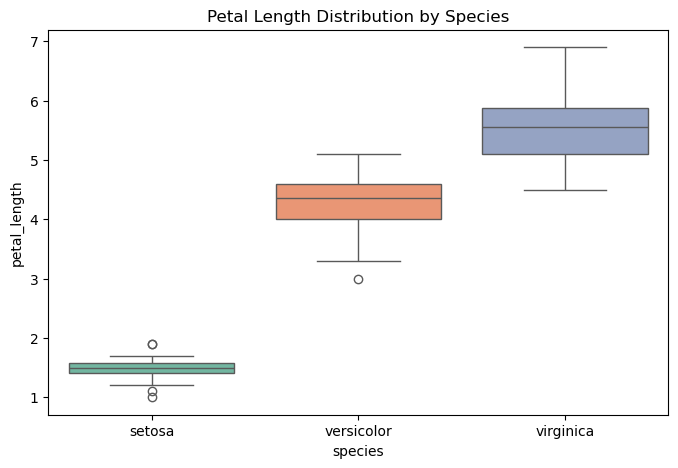

In [90]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='species', y='petal_length', data=df,hue='species', palette='Set2')
plt.title("Petal Length Distribution by Species")
plt.show()

In [48]:
# 2. Probability & Distribution
# 2.1 Normal Distributions
import matplotlib.pyplot as plt
import numpy as np

# Generate normal data

data = np.random.normal(loc=50,scale=10,size=1000)

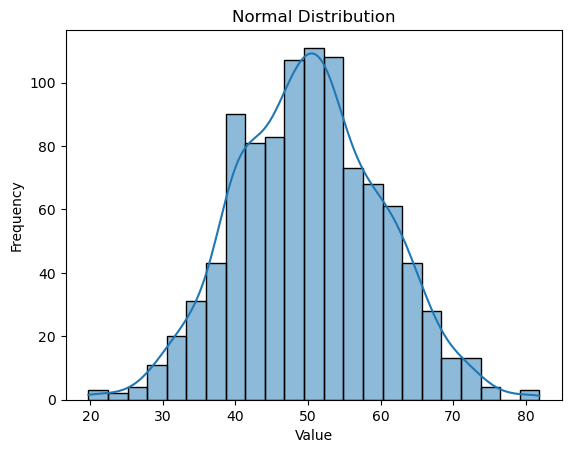

In [50]:
sns.histplot(data, kde=True)
plt.title("Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

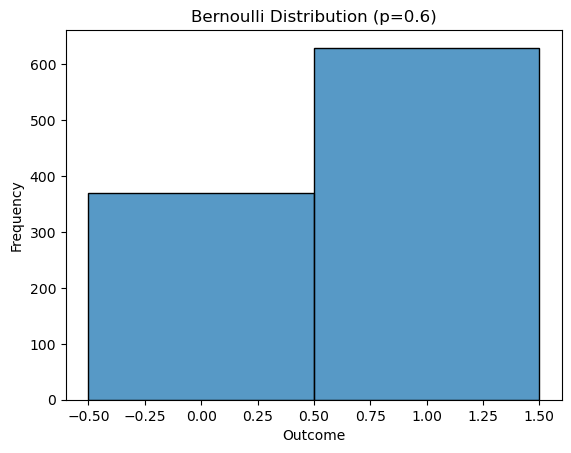

In [52]:
# 2.2 Bernoulli Distribution

from scipy.stats import bernoulli

data = bernoulli.rvs(p=0.6, size=1000)  # 60% chance of success
sns.histplot(data, discrete=True)
plt.title("Bernoulli Distribution (p=0.6)")
plt.xlabel("Outcome")
plt.ylabel("Frequency")
plt.show()

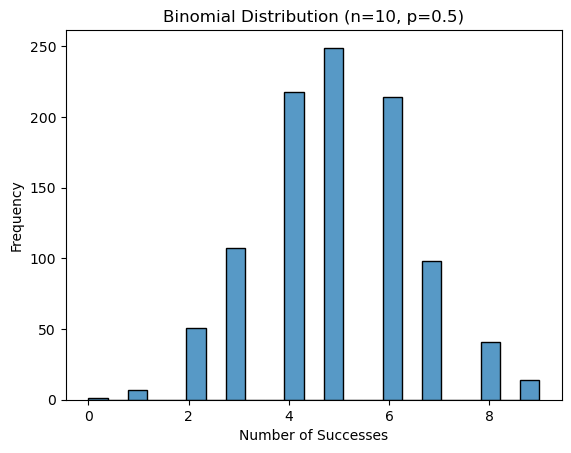

In [54]:
# 2.3 Binomial Distribution
from scipy.stats import binom

# 10 coin flips, p=0.5, repeated 1000 times
data = binom.rvs(n=10, p=0.5, size=1000)
sns.histplot(data, kde=False)
plt.title("Binomial Distribution (n=10, p=0.5)")
plt.xlabel("Number of Successes")
plt.ylabel("Frequency")
plt.show()


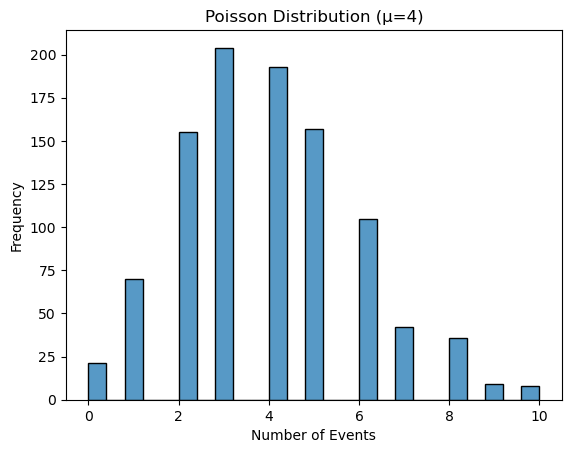

In [56]:
# 2.4 Poisson Distribution
from scipy.stats import poisson

data = poisson.rvs(mu=4, size=1000)  # avg 4 events per interval
sns.histplot(data, kde=False)
plt.title("Poisson Distribution (μ=4)")
plt.xlabel("Number of Events")
plt.ylabel("Frequency")
plt.show()

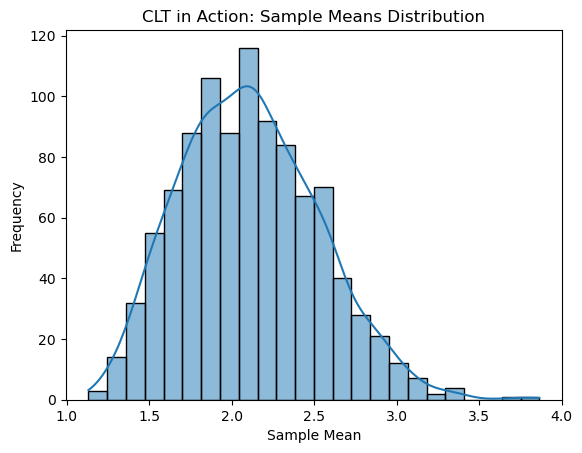

In [60]:
# 2.5 Central Limit Theorem (CLT)

# Original data: exponential (not normal)
original_data = np.random.exponential(scale=2, size=1000)

# Collect means from samples
sample_means = [np.mean(np.random.choice(original_data, size=30)) for _ in range(1000)]

# Plot sample means
sns.histplot(sample_means, kde=True)
plt.title("CLT in Action: Sample Means Distribution")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()


In [62]:
# 3. Inferential Statistics
# 3.1 Hypothesis Testing
# Null Hypothesis (H₀): No effect or difference
# Alternative Hypothesis (H₁): There is an effect or difference

# 3.1.1 T-test
# Independent t-test: Two separate groups (e.g., male vs. female).
# Paired t-test: Same group, two measurements (e.g., before and after).

from scipy.stats import ttest_ind

# Example: compare petal length of setosa and versicolor in iris dataset

group1 = df[df['species'] == 'setosa']['petal_length']
group2 = df[df['species'] == 'versicolor']['petal_length']

t_stat, p_val = ttest_ind(group1, group2)
print(f"T-statistic = {t_stat:.2f}, P-value = {p_val:.4f}")


T-statistic = -39.49, P-value = 0.0000


In [ ]:
# 3.1.2 Z-test
# Similar to t-test, but for large samples (n > 30) and known variance.
# (Usually done with statsmodels or manually; less common now.)

In [ ]:
# 3.1.3 Chi-Square Test

from scipy.stats import chi2_contingency

# Example contingency table
data = pd.DataFrame({
    'Male': [30, 10],
    'Female': [20, 40]
}, index=['Like', 'Dislike'])

chi2, p, dof, expected = chi2_contingency(data)
print(f"Chi-square = {chi2:.2f}, P-value = {p:.4f}")


In [64]:
# 3.1.4 Confidence Intervals
# A range around the sample mean that is likely to contain the true population mean.
# n Usually shown as a 95% CI → meaning if you took 100 samples, 95 of them would contain the true mean.

import scipy.stats as stats

data = np.random.normal(100, 15, 50)
mean = np.mean(data)
sem = stats.sem(data)  # Standard Error of Mean

# 95% Confidence Interval
confidence_interval = stats.t.interval(0.95, len(data)-1, loc=mean, scale=sem)
print(f"95% Confidence Interval: {confidence_interval}")



95% Confidence Interval: (98.86433586220011, 108.98312237647087)


              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


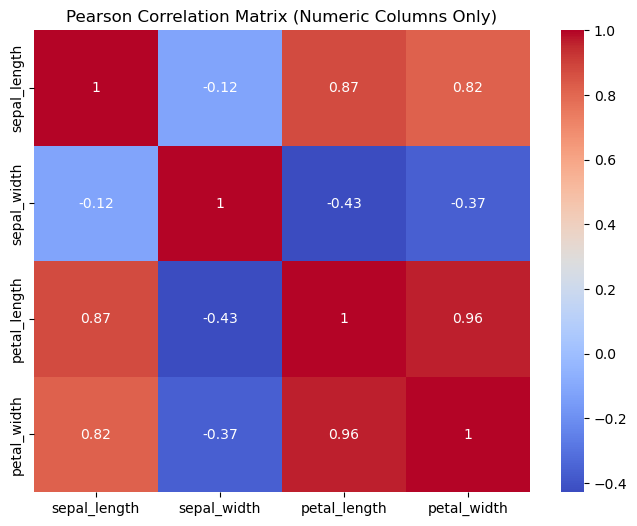

In [68]:
# 4. Correlation vs. Causation
# 4.1 Pearson Correlation

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate Pearson correlation matrix
correlation_matrix = numeric_df.corr(method='pearson')

# Print correlation matrix
print(correlation_matrix)

# Visualize with heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Pearson Correlation Matrix (Numeric Columns Only)")
plt.show()

In [78]:
# 4.2 Spearman Correlation
# Filter only numeric columns from the dataset
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Spearman correlation
spearman_corr = numeric_df.corr(method='spearman')
print(spearman_corr)


              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.166778      0.881898     0.834289
sepal_width      -0.166778     1.000000     -0.309635    -0.289032
petal_length      0.881898    -0.309635      1.000000     0.937667
petal_width       0.834289    -0.289032      0.937667     1.000000


In [ ]:
# Day 5 of the 15-day Data Science challenge focused on Statistics for Machine Learning.
# Covered Descriptive Stats, Distributions, Hypothesis Testing, and Correlations with visualizations using the Iris dataset.
# A critical step in mastering data insights before modeling!